In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as pl


In [2]:
housingData = pd.read_csv('./housing.csv')
display(housingData)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
sum(housingData.total_bedrooms.isna()

207

In [4]:
# Get the non-Nan indices
notna = housingData.total_bedrooms.notna()


In [5]:
#Get the train data of output

outputData = housingData.total_bedrooms.values[notna].reshape(-1,1)
total_rooms = housingData.total_rooms.values[notna].reshape(-1,1) #84.10%
households =housingData.households.values[notna].reshape(-1,1)  #KNN-96.05%；
population = housingData.population.values[notna].reshape(-1,1) 

inputData = np.c_[households,total_rooms]#96.92%
#inputData = np.c_[households,total_rooms,population]#95.49%
#inputData = np.c_[total_rooms,households]
#inputData = households
#inputData = total_rooms

print(inputData.shape)
print(outputData.shape)

#outputData


(20433, 2)
(20433, 1)


In [6]:
#4:1
X_train, X_test, y_train, y_test = train_test_split(inputData, outputData, test_size=0.2, random_state=50)

# Success
print("训练集与测试集拆分成功，训练集有{}条，测试集有{}条。".format(X_train.shape[0], X_test.shape[0]))

训练集与测试集拆分成功，训练集有16346条，测试集有4087条。


In [7]:
#Lossfunction

def performance_metric(y_true, y_predict):
    
    score = r2_score(y_true, y_predict)
   
    return score


In [8]:
def fit_model_k_fold(X, y):
    
    # Create cross-validation sets from the training data
    # cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
    k_fold = KFold(n_splits=10)
    
    # TODO: Create a decision tree regressor object
    regressor = KNeighborsRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'n_neighbors':range(3,15)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, param_grid=params,scoring=scoring_fnc,cv=k_fold)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    
    # Return the optimal model after fitting the data
    return grid

In [9]:
# Fit the training data to the model using grid search
grid = fit_model_k_fold(X_train, y_train)

print ("Parameter 'n_neighbors' is {} for the optimal model.".format(grid.best_estimator_.get_params()['n_neighbors']))


Parameter 'n_neighbors' is 6 for the optimal model.


In [10]:
result = pd.DataFrame(grid.cv_results_).T
display(result)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,0,1,2,3,4,5,6,7,8,9,10,11
mean_fit_time,0.0029398,0.00291963,0.00296788,0.00303435,0.00297821,0.00301342,0.00299194,0.003019,0.00302408,0.00324807,0.0032676,0.00318596
std_fit_time,0.000237408,0.000106538,9.12845e-05,0.000162594,0.000102546,9.25937e-05,9.81288e-05,9.22415e-05,9.97845e-05,0.000320181,0.000356447,0.000241327
mean_score_time,0.00311463,0.00333507,0.00363419,0.00399528,0.00404062,0.00425212,0.00440073,0.00471473,0.00495613,0.00560007,0.00572069,0.00601509
std_score_time,0.000325134,0.000102906,0.000144186,0.000474129,4.05392e-05,6.40173e-05,6.59995e-05,0.000172283,0.000208806,0.000533094,0.000381105,0.000301859
param_n_neighbors,3,4,5,6,7,8,9,10,11,12,13,14
params,{'n_neighbors': 3},{'n_neighbors': 4},{'n_neighbors': 5},{'n_neighbors': 6},{'n_neighbors': 7},{'n_neighbors': 8},{'n_neighbors': 9},{'n_neighbors': 10},{'n_neighbors': 11},{'n_neighbors': 12},{'n_neighbors': 13},{'n_neighbors': 14}
split0_test_score,0.966373,0.968879,0.966616,0.968737,0.968521,0.967182,0.966366,0.965023,0.964154,0.964234,0.963871,0.962716
split1_test_score,0.976449,0.976681,0.978512,0.976688,0.977408,0.977273,0.977702,0.977852,0.978135,0.977915,0.97861,0.978483
split2_test_score,0.969825,0.97065,0.971031,0.972347,0.972392,0.972736,0.971779,0.972991,0.972521,0.971606,0.97184,0.971482
split3_test_score,0.970367,0.97111,0.97301,0.973712,0.973568,0.973578,0.974161,0.973306,0.973107,0.972779,0.973311,0.973064


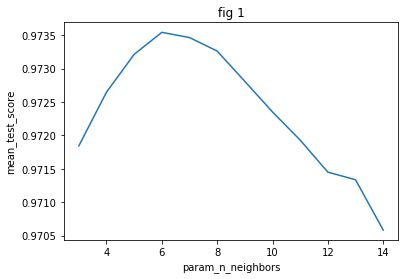

In [11]:
param_n_neighbors = result.loc["param_n_neighbors"]
mean_test_score = result.loc["mean_test_score"]
pl.plot(param_n_neighbors,mean_test_score)
pl.title("fig 1")# give plot a title
pl.xlabel("param_n_neighbors")# make axis labels
pl.ylabel("mean_test_score")
pl.show()


In [12]:
print(performance_metric(y_test, grid.best_estimator_.predict(X_test)))

0.9692493420589631


In [16]:
#Using LinearRegression moudle
model = lm.LinearRegression()
model.fit(X_train,y_train )
print(performance_metric(y_test, model.predict(X_test)))

0.9684470964780475


In [17]:
# predict new data

# Get the non-Nan indices
isna = housingData.total_bedrooms.isna()

total_rooms_isna = housingData.total_rooms.values[isna].reshape(-1,1)
households_isna =housingData.households.values[isna].reshape(-1,1)
input_isna = np.c_[households_isna,total_rooms_isna]



In [24]:
missing_bedrooms = grid.best_estimator_.predict(input_isna)

missing_bedrooms = np.floor(missing_bedrooms)

housingData.total_bedrooms.loc[isna] = np.squeeze(missing_bedrooms)

#display(housingData)
#sum(housingData.total_bedrooms.isna())

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
housingData.to_csv("./new_housing.csv",index=False,sep=',')